In [2]:
import pyreadstat

# read the .sav file
questionnaire_data, meta = pyreadstat.read_sav("BrainsInSync_Qualtrics_June8-2022_FINAL.sav")
display(questionnaire_data.head())

# IDs of participants in the neural synchrony dataset
ids = ['T029', 'T035', 'T036', 'T049', 'T050', 'T056', 'T122', 'T137', 'T188', 'T212', 'T262', 'T287', 'T290', 'T351', 'T389', 'T435', 'T475', 'T477', 'T484', 'T487', 'T520', 'T551', 'T563', 'T576', 'T596', 'T600', 'T623', 'T637', 'T655', 'T682', 'T684', 'T775', 'T802', 'T815', 'T882', 'T892', 'T899', 'T916', 'T917', 'T997']

# IDs of participants from the qualtrics survey
questionnaire_data_ids = list(questionnaire_data['ID'])
excluded_participants = ['T475', 'T563', 'T623', 'T802', 'T899', 'T916', 'T917']

# list of participant IDs to exclude because of missing data
exclude_ids = [i for i in questionnaire_data_ids if i not in ids or i in excluded_participants]

# exclude rows with the specified IDs
questionnaire_data = questionnaire_data[~questionnaire_data['ID'].isin(exclude_ids)]

questionnaire_data.to_csv('BrainsInSync_Questionnaire_Data.csv')

,ID,RecordedDate,Date_EEG,Age_child_EEG_Days,Age_child_EEG_Months,Birthdate_child,Sex_Infant,GA_atbirth_1,GA_atbirth_2,Type_Birth,...,PBQ_Sum,PBQ_General_Mean,PBQ_General_Sum,PBQ_AngerRejection_Mean,PBQ_AngerRejection_Sum,PBQ_ConfidenceAnx_Mean,PBQ_ConfidenceAnx_Sum,PBQ_AgressionBaby_Mean,PBQ_AgressionBaby_Sum,Opmerkingen_overig
0,T802,2021-04-14 10:10:45,2021-04-23,417.0,13.0,2020-03-02,1.0,38,2,1.0,...,4.0,0.166667,2.0,0.142857,1.0,0.25,1.0,0.0,0.0,
1,T563,2021-04-28 19:19:05,2021-04-29,327.0,10.0,2020-06-06,1.0,39,4,1.0,...,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,
2,T029,2021-04-28 22:56:12,2021-05-19,370.0,12.0,2020-05-14,1.0,39,6,1.0,...,31.0,1.500000,18.0,1.285714,9.0,1.00,4.0,0.0,0.0,
3,T035,2021-05-10 20:11:42,2021-05-12,357.0,11.0,2020-05-20,1.0,38,4,1.0,...,6.0,0.250000,3.0,0.000000,0.0,0.75,3.0,0.0,0.0,
4,T775,2021-05-12 18:47:39,2021-05-21,233.0,7.0,2020-09-30,2.0,39,6,1.0,...,4.0,0.250000,3.0,0.000000,0.0,0.25,1.0,0.0,0.0,


In [3]:
import pandas as pd 
theta_synchrony = pd.read_csv('validated_data_theta_plv.csv')
still_face_theta = theta_synchrony[['sf1', 'sf2']].mean(axis=1)
still_face_theta = still_face_theta.reset_index(drop=True)
overall_synchrony = theta_synchrony[['fp1', 'sf1', 'fp2', 'sf2', 'reunion']].mean(axis=1)
print(overall_synchrony)

0     0.575569
1     0.546571
2     0.571714
3     0.527419
4     0.522165
5     0.554927
6     0.553705
7     0.554140
8     0.545606
9     0.581338
10    0.554270
11    0.556306
12    0.543184
13    0.535868
14    0.544218
15    0.548867
16    0.540631
17    0.556861
18    0.558644
19    0.566302
20    0.545734
21    0.591578
22    0.567568
23    0.551368
24    0.550770
25    0.571361
26    0.571648
27    0.535852
28    0.546475
29    0.558234
30    0.600202
31    0.546297
32    0.545444
dtype: float64


[4.3637422080923285, 5.542611458939025, 2.2435787856428315]
[0.79022413 0.08203388 0.44240495]


/home/agata/Desktop/thesis/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


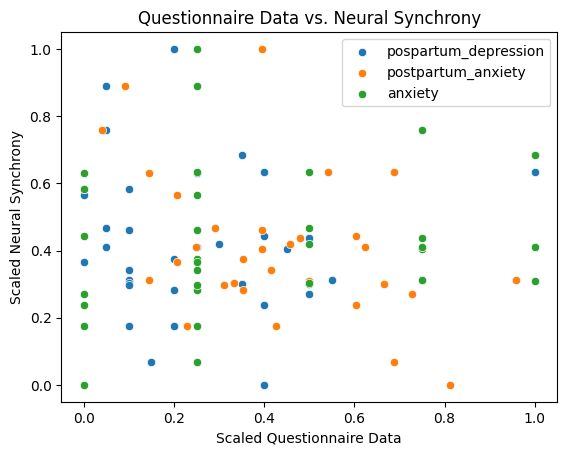

In [4]:
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

postpartum_depression = np.array(questionnaire_data['EDS_mean'])
postpartum_anxiety = np.array(questionnaire_data['PSAS_mean'])
anxiety = np.array(questionnaire_data['PBQ_ConfidenceAnx_Mean'])

X = np.column_stack((postpartum_depression, postpartum_anxiety, anxiety))
X_df = pd.DataFrame(X)
vif = [variance_inflation_factor(X_df, i) for i in X_df]
print(vif)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
still_face_scaled = pd.DataFrame(scaler.fit_transform(np.array(overall_synchrony).reshape(-1, 1)))

sns.scatterplot(x=X_scaled[:, 0],
                y=still_face_scaled[0]).set(title='Questionnaire Data vs. Neural Synchrony')
sns.scatterplot(x=X_scaled[:, 1],
                y=still_face_scaled[0])
sns.scatterplot(x=X_scaled[:, 2],
                y=still_face_scaled[0])

plt.xlabel('Scaled Questionnaire Data')
plt.ylabel('Scaled Neural Synchrony')
plt.legend(labels=['pospartum_depression', 'postpartum_anxiety', 'anxiety'])

postpartum_depression = postpartum_depression.reshape(-1, 1)
anxiety = anxiety.reshape(-1, 1)
postpartum_anxiety = postpartum_anxiety.reshape(-1, 1)

model = LinearRegression()
model.fit(X_scaled, still_face_scaled)
p_values = f_regression(X_scaled, still_face_scaled)[1]
print(p_values)